### Viewing and Structuring the Data

In [23]:
! ls /datarepo/Seagate\ Backup\ Plus\ Drive/ifcb_data/home/coolgroup/ANTARCTICA/PAL-LTER/Station/2017-2018/IFCB/Data/PAL1718_LTER/x171127B/ecotaxa/D20171127T182512_IFCB116/D20171127T182512_IFCB116_00002.png

/datarepo/Seagate Backup Plus Drive/ifcb_data/home/coolgroup/ANTARCTICA/PAL-LTER/Station/2017-2018/IFCB/Data/PAL1718_LTER/x171127B/ecotaxa/D20171127T182512_IFCB116/D20171127T182512_IFCB116_00002.png


In [1]:
fp = '/datarepo/Seagate\ Backup\ Plus\ Drive/ifcb_data/home/coolgroup/ANTARCTICA/PAL-LTER/Station/2017-2018/IFCB/Data/PAL1718_LTER/x171127B'
fp

'/datarepo/Seagate\\ Backup\\ Plus\\ Drive/ifcb_data/home/coolgroup/ANTARCTICA/PAL-LTER/Station/2017-2018/IFCB/Data/PAL1718_LTER/x171127B'

In [24]:
fp = '/datarepo/Seagate Backup Plus Drive/ifcb_data/home/coolgroup/ANTARCTICA/PAL-LTER/Station/2017-2018/IFCB/Data/PAL1718_LTER/x171127B/ecotaxa/D20171127T182512_IFCB116/D20171127T182512_IFCB116_00002.png'
fp

'/datarepo/Seagate Backup Plus Drive/ifcb_data/home/coolgroup/ANTARCTICA/PAL-LTER/Station/2017-2018/IFCB/Data/PAL1718_LTER/x171127B/ecotaxa/D20171127T182512_IFCB116/D20171127T182512_IFCB116_00002.png'

In [56]:
import pandas as pd

In [60]:
img_md = pd.read_csv('/datarepo/Seagate Backup Plus Drive/ifcb_data/ecotaxa_export_3203_20200731_1928.tsv', sep='\t')

/root/miniconda3/envs/earthml/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (5,9,10,262,263) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [61]:
'object_lat', 'object_lon', 'object_date', 'object_time'

,object_id,object_lat,object_lon,object_date,object_time,object_link,object_depth_min,object_depth_max,object_annotation_status,object_annotation_person_name,...,process_soft_version,process_script,process_script_version,process_library,process_library_version,process_date,process_time,acq_id,acq_instrument,acq_resolution_pixels_per_micron
0,D20180221T193119_IFCB116_01153,-64.7535,-64.1339,20180221,193119,NaN,5.0,5.0,validated,Schuyler Nardelli,...,R2016a,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,IFCB116,IFCB,3.4
1,D20180221T202431_IFCB116_00153,-64.7741,-64.1655,20180221,202431,NaN,5.0,5.0,validated,Schuyler Nardelli,...,R2016a,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,IFCB116,IFCB,3.4
2,D20180221T202431_IFCB116_01303,-64.7741,-64.1655,20180221,202431,NaN,5.0,5.0,validated,Schuyler Nardelli,...,R2016a,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,IFCB116,IFCB,3.4
3,D20180221T202431_IFCB116_03008,-64.7741,-64.1655,20180221,202431,NaN,5.0,5.0,validated,Schuyler Nardelli,...,R2016a,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,IFCB116,IFCB,3.4
4,D20180221T212254_IFCB116_07034,-64.7802,-63.9785,20180221,212254,NaN,5.0,5.0,validated,Schuyler Nardelli,...,R2016a,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,IFCB116,IFCB,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463891,D20181227T155007_IFCB116_03484,-64.8138,-64.0417,20181227,155007,http://pal.lternet.edu/,65.0,65.0,predicted,NaN,...,R2018b,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,IFCB116,IFCB,3.4
1463892,D20181227T155007_IFCB116_03485,-64.8138,-64.0417,20181227,155007,http://pal.lternet.edu/,65.0,65.0,predicted,NaN,...,R2018b,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,IFCB116,IFCB,3.4
1463893,D20181227T155007_IFCB116_03486,-64.8138,-64.0417,20181227,155007,http://pal.lternet.edu/,65.0,65.0,predicted,NaN,...,R2018b,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,IFCB116,IFCB,3.4
1463894,D20181227T155007_IFCB116_03487,-64.8138,-64.0417,20181227,155007,http://pal.lternet.edu/,65.0,65.0,predicted,NaN,...,R2018b,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,IFCB116,IFCB,3.4


In [95]:
img_md_subset = img_md[['object_id','object_annotation_status', 'object_annotation_category', 'object_annotation_hierarchy', 'sample_flag', 'object_lat', 'object_lon', 'object_date', 'object_time']]

In [84]:
img_md.size / img_md_subset.size

31.11111111111111

In [96]:
img_md_subset[img_md_subset['object_date'] == 20171127]

,object_id,object_annotation_status,object_annotation_category,object_annotation_hierarchy,sample_flag,object_lat,object_lon,object_date,object_time


In [97]:
img_md_subset.groupby('object_date')['object_id'].nunique()

object_date
20170830       50
20170831      163
20170901      136
20170902      115
20170903       62
            ...  
20190117    30428
20190121    25725
20190122    52282
20190124    20945
20190125    23892
Name: object_id, Length: 91, dtype: int64

In [ ]:
unique_validated = img_md_subset[img_md_subset.object_annotation_status == 'validated'].groupby('object_annotation_category')['object_id'].nunique()
#unique_validated.to_csv('unique_validated.csv')

#### Getting Images Organized

In [ ]:
compile all images into a single directory
    go into ecotaxa and unzip all files into a single place

In [ ]:
object_annotation_category == label
object_annotation_status == 'validated'
    but check to see if there are any other options

In [ ]:
fp_list = []
labels = []

### Model Testing

test a very simple CNN

test a medium CNN

test a full Xception/InceptionResNetV2

In [2]:
from tensorflow import keras

In [3]:
keras.__version__

'2.3.0-tf'

In [34]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = Xception(weights='imagenet')


# triplicate the image
# print(grayscale_batch.shape)  # (64, 224, 224)
# rgb_batch = np.repeat(grayscale_batch[..., np.newaxis], 3, -1)
# print(rgb_batch.shape)  # (64, 224, 224, 3)

img_path = fp
img = image.load_img(img_path, target_size=(299, 299), color_mode="rgb")
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

Predicted: [('n02708093', 'analog_clock', 0.4886681), ('n02910353', 'buckle', 0.28389433), ('n03942813', 'ping-pong_ball', 0.14777376)]


(299, 299, 3)
(1, 299, 299, 3)
(1, 299, 299, 3)


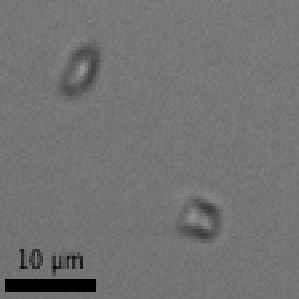

In [55]:
img = image.load_img(fp, target_size=(299, 299), color_mode="rgb")
x = image.img_to_array(img)
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
preprocess_input(x)
print(x.shape)
img

In [17]:
model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_7[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________